# A Practical Overview of Classifiction Algorithms

## Data set of Digit number recognition 
-  Data set is made of 8x8 images of digits
    - we start with loading dataset

In [17]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn import tree

# The digits dataset
digits = datasets.load_digits()

-  Now let's have a look at some of the first images, stored in the images attribute of the dataset
    -   If we were working from image files, we could load them using matplotlib.pyplot.imread. Note that each image must have the same size. For these images, we know which digit they represent: it is given in the 'target' of the dataset.


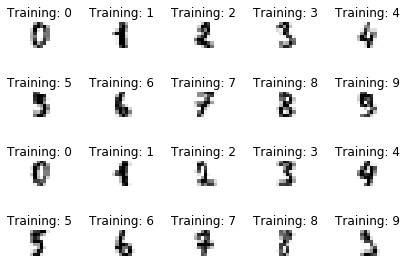

In [18]:
# The digits dataset
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:20]):
    plt.subplot(4, 5, index + 1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r)
    plt.title('Training: %i' % label)
    plt.tight_layout()
plt.show()

-  We need to do some preprocessing!

In [19]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
print(n_samples)
print(digits.images)

1797
[[[  0.   0.   5. ...,   1.   0.   0.]
  [  0.   0.  13. ...,  15.   5.   0.]
  [  0.   3.  15. ...,  11.   8.   0.]
  ..., 
  [  0.   4.  11. ...,  12.   7.   0.]
  [  0.   2.  14. ...,  12.   0.   0.]
  [  0.   0.   6. ...,   0.   0.   0.]]

 [[  0.   0.   0. ...,   5.   0.   0.]
  [  0.   0.   0. ...,   9.   0.   0.]
  [  0.   0.   3. ...,   6.   0.   0.]
  ..., 
  [  0.   0.   1. ...,   6.   0.   0.]
  [  0.   0.   1. ...,   6.   0.   0.]
  [  0.   0.   0. ...,  10.   0.   0.]]

 [[  0.   0.   0. ...,  12.   0.   0.]
  [  0.   0.   3. ...,  14.   0.   0.]
  [  0.   0.   8. ...,  16.   0.   0.]
  ..., 
  [  0.   9.  16. ...,   0.   0.   0.]
  [  0.   3.  13. ...,  11.   5.   0.]
  [  0.   0.   0. ...,  16.   9.   0.]]

 ..., 
 [[  0.   0.   1. ...,   1.   0.   0.]
  [  0.   0.  13. ...,   2.   1.   0.]
  [  0.   0.  16. ...,  16.   5.   0.]
  ..., 
  [  0.   0.  16. ...,  15.   0.   0.]
  [  0.   0.  15. ...,  16.   0.   0.]
  [  0.   0.   2. ...,   6.   0.   0.]]

 [[  0.   0.

In [20]:
data = digits.images.reshape((n_samples, -1))
print(data)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


-  Now it is the time to see what our classification algorithms do

In [21]:
# Create a classifier: 

classifier = MLPClassifier(hidden_layer_sizes=(100,))

# We learn the digits on the first half of the digits
classifier.fit(data[:9*(n_samples) // 10], digits.target[:9*(n_samples) // 10])

# Now predict the value of the digit on the second half:
expected = digits.target[9*(n_samples) // 10:]
predicted = classifier.predict(data[9*(n_samples) // 10:])



-  Lets show the predictions :) 

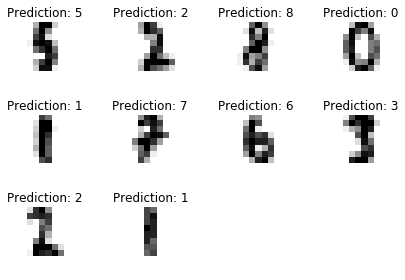

In [24]:
images_and_predictions = list(zip(digits.images[9*(n_samples) // 10:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:10]):
    plt.subplot(3, 4, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('Prediction: %i' % prediction)
    plt.tight_layout()
plt.show()

-  You can use evaluation metrics to compare your classifications

In [25]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))


Classification report for classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      1.00      1.00        19
          2       1.00      1.00      1.00        17
          3       0.87      0.72      0.79        18
          4       0.90      0.95      0.93        20
          5       0.90      1.00      0.95        18
          6       1.00      1.00      1.00        18
          7       0.94      0.89      0.92        19
          8       0.84      0.94      0.89        